In [1]:
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

from m2_utilities.load_data import load_trajectories
from m2_utilities.preprocessor import get_tokenizer, batch_stringify, batch_destringify

%load_ext autoreload
%autoreload 2

### Loading Predator-Prey Data

In [2]:
unscaled_trajectories = load_trajectories("data/lotka_volterra_data.h5")
tokenizer = get_tokenizer()

### Scaling So All Values < 10

In [3]:
ALPHA = 1.5
trajectories = unscaled_trajectories / ALPHA

### Making Some Visualisations

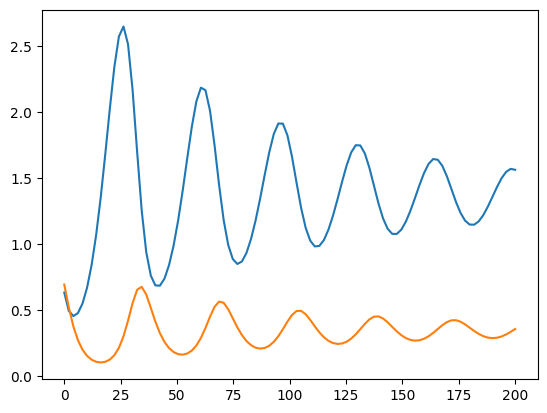

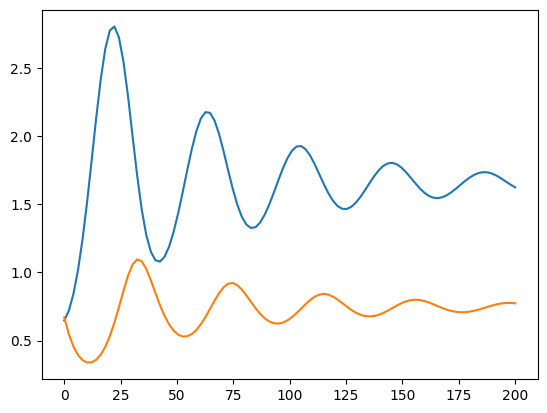

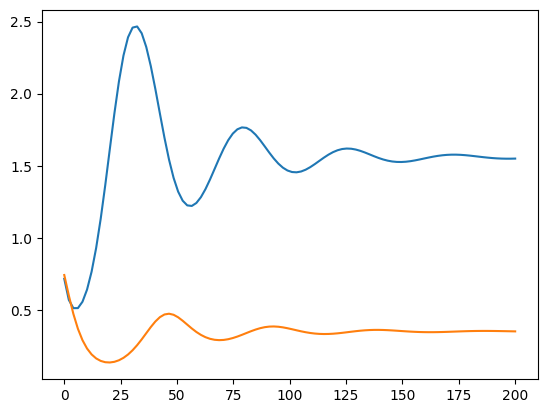

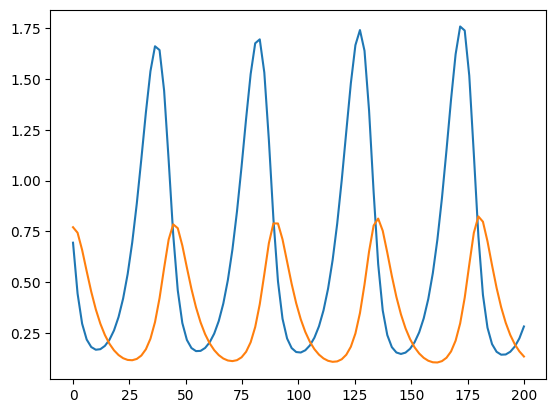

In [4]:
system_ids = [0, 1, 2, 3]

time_points = torch.linspace(0, 200, 100)
for system_id in system_ids:
    predators = trajectories[system_id, :, 0]
    prey = trajectories[system_id, :, 1]

    plt.plot(time_points, predators)
    plt.plot(time_points, prey)
    plt.show()

### Some Metrics

In [5]:
# Unscaled
print(f"Max Predators: {torch.max(unscaled_trajectories[:, :, 0])}")
print(f"Min Predators: {torch.min(unscaled_trajectories[:, :, 0])}")
print(f"Max Prey: {torch.max(unscaled_trajectories[:, :, 1])}")
print(f"Min Prey: {torch.min(unscaled_trajectories[:, :, 1])}")

Max Predators: 13.740113258361816
Min Predators: 0.002077328274026513
Max Prey: 4.768490314483643
Min Prey: 3.735509380931035e-05


In [6]:
# Scaled
print(f"Max Predators: {torch.max(trajectories[:, :, 0])}")
print(f"Min Predators: {torch.min(trajectories[:, :, 0])}")
print(f"Max Prey: {torch.max(trajectories[:, :, 1])}")
print(f"Min Prey: {torch.min(trajectories[:, :, 1])}")

Max Predators: 9.160075187683105
Min Predators: 0.0013848855160176754
Max Prey: 3.1789934635162354
Min Prey: 2.4903396479203366e-05


### Stringifying and Tokenizing the Trajectories

In [7]:
# Stringify
print(trajectories[0])
DECIMALS = 3
texts = batch_stringify(trajectories, DECIMALS)

tensor([[0.6333, 0.6937],
        [0.4937, 0.5197],
        [0.4548, 0.3763],
        [0.4778, 0.2718],
        [0.5497, 0.2002],
        [0.6697, 0.1532],
        [0.8420, 0.1241],
        [1.0703, 0.1082],
        [1.3541, 0.1029],
        [1.6819, 0.1079],
        [2.0273, 0.1249],
        [2.3455, 0.1581],
        [2.5761, 0.2142],
        [2.6518, 0.3009],
        [2.5170, 0.4200],
        [2.1704, 0.5531],
        [1.7006, 0.6543],
        [1.2559, 0.6768],
        [0.9395, 0.6180],
        [0.7618, 0.5168],
        [0.6877, 0.4127],
        [0.6856, 0.3252],
        [0.7391, 0.2589],
        [0.8412, 0.2123],
        [0.9893, 0.1823],
        [1.1803, 0.1661],
        [1.4064, 0.1623],
        [1.6520, 0.1707],
        [1.8898, 0.1929],
        [2.0826, 0.2315],
        [2.1877, 0.2890],
        [2.1684, 0.3649],
        [2.0127, 0.4504],
        [1.7495, 0.5255],
        [1.4480, 0.5648],
        [1.1823, 0.5556],
        [0.9939, 0.5064],
        [0.8875, 0.4383],
        [0.8

In [12]:
# Tokenize
all_token_ids = tokenizer(texts, return_tensors="pt", add_special_tokens=False)["input_ids"]

### Decoding Tokens and Destringifying to Restore Original Trajectories

In [13]:
# Decode
restored_texts = tokenizer.batch_decode(all_token_ids, return_tensors="pt", add_special_tokens=False)

In [14]:
# Destringify
restored_trajectories = batch_destringify(restored_texts)
print(restored_trajectories[0])

tensor([[0.6330, 0.6940],
        [0.4940, 0.5200],
        [0.4550, 0.3760],
        [0.4780, 0.2720],
        [0.5500, 0.2000],
        [0.6700, 0.1530],
        [0.8420, 0.1240],
        [1.0700, 0.1080],
        [1.3540, 0.1030],
        [1.6820, 0.1080],
        [2.0270, 0.1250],
        [2.3450, 0.1580],
        [2.5760, 0.2140],
        [2.6520, 0.3010],
        [2.5170, 0.4200],
        [2.1700, 0.5530],
        [1.7010, 0.6540],
        [1.2560, 0.6770],
        [0.9390, 0.6180],
        [0.7620, 0.5170],
        [0.6880, 0.4130],
        [0.6860, 0.3250],
        [0.7390, 0.2590],
        [0.8410, 0.2120],
        [0.9890, 0.1820],
        [1.1800, 0.1660],
        [1.4060, 0.1620],
        [1.6520, 0.1710],
        [1.8900, 0.1930],
        [2.0830, 0.2310],
        [2.1880, 0.2890],
        [2.1680, 0.3650],
        [2.0130, 0.4500],
        [1.7490, 0.5260],
        [1.4480, 0.5650],
        [1.1820, 0.5560],
        [0.9940, 0.5060],
        [0.8880, 0.4380],
        [0.8